<h1>
    <font color=0000FF>
        Using Metabolites in the Wastewater to measure Drug Consumption - Machine Learning Clustering
    </font>
</h1>
<h3>
    <font color=89CFF0>
        An Open Source Data Project using Data from the European Monitoring Centre for Drugs and Drug Addiction (EMCDDA) and the SCORE network
    </font>
</h3>      


<img src="https://cdn.pixabay.com/photo/2021/12/21/06/27/line-6884685_960_720.jpg">
Picture taken from <a href="https://pixabay.com/de/photos/linie-linien-ornament-ornamente-6884685/">Pixabay</a>, from the user <a href="https://pixabay.com/de/users/xresch-7410129/?tab=most-relevant&pagi=1">"xresch"</a>.

<h2>
    <font color=0096FF>
        Content & Structure<a id='start'></a>
    </font>
</h2>
<h3>
    <font color=0096FF>
        <p>
            <a href='#first_chapter'>1. Library and Data Import</a>         
        <p>
            <a href='#second_chapter'>2. Clustering the complete Dataframe</a>
        <p>
            <a href='#third_chapter'>3. Clustering portions of the Dataframe</a>
        <p>
            <a href='#fourth_chapter'>4. The Stats and Charts of the Clusters</a>
        <p>
            <a href='#fifth_chapter'>5. Limitation and Parameters</a>
    </font>
</h3>  

<h3>
    <font color=0096FF>
        Recap
    </font>
</h3>
<p>
    The pervious notebook tackled a regression model. This notebook will tackle a clustering model.
<p>


<h2>
    <font color=0096FF>
        <a href='#start'>1. Library and Data Import</a><a id='first_chapter'></a>
    </font>
</h2>

In [23]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl
from IPython.core.interactiveshell import InteractiveShell

In [24]:
# Setting up options

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
InteractiveShell.ast_node_interactivity = 'all'
%matplotlib inline

In [25]:
# Setting up the path for import/export/etc.

path = r'X:/Data_Analytic/JUPYTER/Achievement 6'

In [26]:
# Importing the dataframe

df_wastewater = pd.read_pickle(os.path.join(path,'02 Data','02 Prepared Data','df_wastewater_tagged_post_6-3.pkl'))

In [27]:
# Checking the dataframe

df_wastewater.head()
df_wastewater.shape
df_wastewater.info()
df_wastewater.isnull().sum()
df_wastewater.duplicated().shape

,year,metabolite,SiteID,country,city,latitude,longitude,population,Wednesday,Thursday,Friday,Saturday,Sunday,Monday,Tuesday,Weekday mean,Weekend mean,Daily mean,Consumption flag,avg diff weekend-weekday,Name
0,2021,amphetamine,AT001,AT,Graz,47.070713,15.439504,487040,47.15,37.48,37.95,38.02,38.14,35.82,35.45,40.03,37.48,38.57,mid consumption,-2.55,Austria
1,2021,cannabis,AT001,AT,Graz,47.070713,15.439504,487040,54.77,80.42,60.1,53.88,50.46,77.04,233.51,122.9,60.37,87.17,mid consumption,-62.53,Austria
2,2021,cocaine,AT001,AT,Graz,47.070713,15.439504,487040,127.6,121.48,137.75,174.94,179.55,117.31,111.91,120.33,152.39,138.65,high consumption,32.06,Austria
3,2021,MDMA,AT001,AT,Graz,47.070713,15.439504,487040,5.82,4.53,5.27,16.56,17.37,10.14,7.83,6.06,12.33,9.64,mid consumption,6.27,Austria
4,2021,methamphetamine,AT001,AT,Graz,47.070713,15.439504,487040,12.44,11.24,14.99,9.33,18.66,9.33,15.66,13.11,13.08,13.09,mid consumption,-0.03,Austria


(2569, 21)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2569 entries, 0 to 2568
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      2569 non-null   Int64  
 1   metabolite                2569 non-null   string 
 2   SiteID                    2569 non-null   string 
 3   country                   2569 non-null   object 
 4   city                      2569 non-null   string 
 5   latitude                  2569 non-null   Float64
 6   longitude                 2569 non-null   Float64
 7   population                2569 non-null   int32  
 8   Wednesday                 2569 non-null   Float64
 9   Thursday                  2569 non-null   Float64
 10  Friday                    2569 non-null   Float64
 11  Saturday                  2569 non-null   Float64
 12  Sunday                    2569 non-null   Float64
 13  Monday                    2569 non-null   Float64
 14  Tuesday 

year                        0
metabolite                  0
SiteID                      0
country                     0
city                        0
latitude                    0
longitude                   0
population                  0
Wednesday                   0
Thursday                    0
Friday                      0
Saturday                    0
Sunday                      0
Monday                      0
Tuesday                     0
Weekday mean                0
Weekend mean                0
Daily mean                  0
Consumption flag            0
avg diff weekend-weekday    0
Name                        0
dtype: int64

(2569,)

<h2>
    <font color=0096FF>
        <a href='#start'>2. Clustering the complete Dataframe</a><a id='second_chapter'></a>
    </font>
</h2>

For the clustering process, we can't have categorical data. Therefore, all categorical columns will be excluded in a subset

In [28]:
# Getting rid of unwanted columns in preparation of clustering

df_wastewater_sub = df_wastewater[['year','latitude','longitude','population','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday','Weekday mean','Weekend mean','Daily mean']]

In [29]:
df_wastewater_sub.head()

,year,latitude,longitude,population,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Weekday mean,Weekend mean,Daily mean
0,2021,47.070713,15.439504,487040,35.82,35.45,47.15,37.48,37.95,38.02,38.14,40.03,37.48,38.57
1,2021,47.070713,15.439504,487040,77.04,233.51,54.77,80.42,60.1,53.88,50.46,122.9,60.37,87.17
2,2021,47.070713,15.439504,487040,117.31,111.91,127.6,121.48,137.75,174.94,179.55,120.33,152.39,138.65
3,2021,47.070713,15.439504,487040,10.14,7.83,5.82,4.53,5.27,16.56,17.37,6.06,12.33,9.64
4,2021,47.070713,15.439504,487040,9.33,15.66,12.44,11.24,14.99,9.33,18.66,13.11,13.08,13.09


In [30]:
# Checking the elbow curve to get an idea of how many clusters to use

number_possible_clusters = range(1,10)
kmeans_score = [KMeans(n_clusters=i) for i in number_possible_clusters]

In [31]:
cluster_score = [kmeans_score[i].fit(df_wastewater_sub).score(df_wastewater_sub) for i in range(len(kmeans_score))]

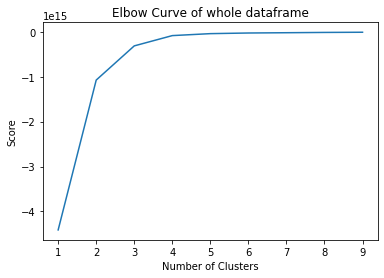

In [32]:
pl.plot(number_possible_clusters,cluster_score)
pl.xlabel('Number of Clusters');
pl.ylabel('Score');
pl.title('Elbow Curve of whole dataframe');
plt.show();

<b>As we can see in the elbow curve, the breaking point seems to be either 2 or 3. I'm going to chose 3.</b>

In [33]:
# Setting up the kmeans object to data

kmeans_df_whole = KMeans(n_clusters=3)

In [34]:
# Fit kmeans object

kmeans_df_whole.fit(df_wastewater_sub)

KMeans(n_clusters=3)

In [35]:
# Setting up the cluster column

df_wastewater_sub['clusters'] = kmeans_df_whole.fit_predict(df_wastewater_sub)

C:\Users\Nils\AppData\Local\Temp/ipykernel_7088/1838139880.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wastewater_sub['clusters'] = kmeans_df_whole.fit_predict(df_wastewater_sub)


In [36]:
# Checking if everything worked

df_wastewater_sub.head()

,year,latitude,longitude,population,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Weekday mean,Weekend mean,Daily mean,clusters
0,2021,47.070713,15.439504,487040,35.82,35.45,47.15,37.48,37.95,38.02,38.14,40.03,37.48,38.57,2
1,2021,47.070713,15.439504,487040,77.04,233.51,54.77,80.42,60.1,53.88,50.46,122.9,60.37,87.17,2
2,2021,47.070713,15.439504,487040,117.31,111.91,127.6,121.48,137.75,174.94,179.55,120.33,152.39,138.65,2
3,2021,47.070713,15.439504,487040,10.14,7.83,5.82,4.53,5.27,16.56,17.37,6.06,12.33,9.64,2
4,2021,47.070713,15.439504,487040,9.33,15.66,12.44,11.24,14.99,9.33,18.66,13.11,13.08,13.09,2


In [37]:
# Checking the column numbers

df_wastewater_sub['clusters'].value_counts()

2    2477
0      79
1      13
Name: clusters, dtype: int64

<b>Before this point, I already assumed that the result would be something like this. The clustering of 7 days, including the several means and not segregating by metabolite was bound to be rather useless. Therefore, I will continue in chapter 3 with the dataframes for the three drug combinations already created in an earlier notebook.</b>

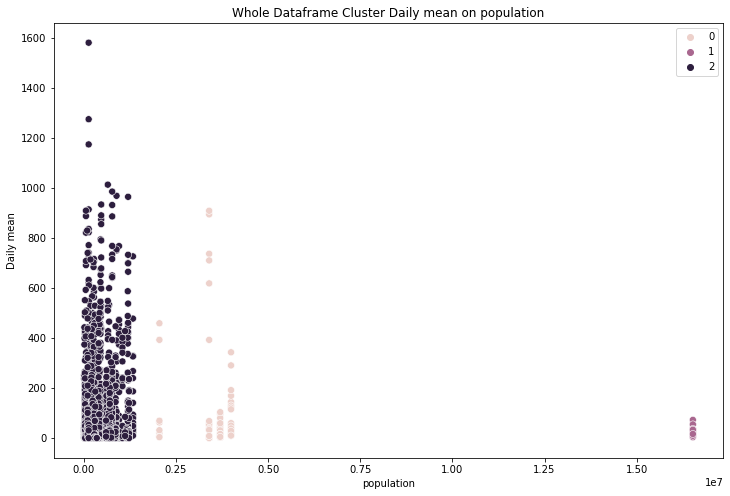

In [38]:
# Setting up the first chart

plt.figure(figsize=(12,8));
sns.scatterplot(x=df_wastewater_sub['population'],y=df_wastewater_sub['Daily mean'],hue=kmeans_df_whole.labels_,s=50);
plt.grid(False);
plt.title('Whole Dataframe Cluster Daily mean on population')
plt.savefig(os.path.join(path,'04 Analysis','01 Visualizations','05 Machine Learning Clustering','Whole DF Daily mean on population Cluster.jpg'),bbox_inches='tight')
plt.show();

Well, looks like I figured out on which variable the clustering happened.

In [39]:
# Merging the clusters into the original dataframe and exporting the original dataframe for further usage
#
# The following chapters explain, why the clustering is not of much use in this specific case.

df_wastewater['clusters'] = df_wastewater_sub['clusters']

In [40]:
df_wastewater.to_pickle(os.path.join(path, '02 Data','02 Prepared Data','df_wastewater_clustering_post_6-5.pkl'))
df_wastewater.to_csv(os.path.join(path, '02 Data','02 Prepared Data','df_wastewater_clustering_post_6-5.csv'))

<h2>
    <font color=0096FF>
        <a href='#start'>3. Clustering portions of the Dataframe</a><a id='third_chapter'></a>
    </font>
</h2>

After seeing the result of the first cluster, and out of curiosity I test what happens if the kmeans cluster is fitted on the specific drug combinations from the previous notebook each and on one dataframe containing all the three drug combinations.
<p>
    I'm assuming that in need of other variables, the cluster of the specific drug combinations dataframe will cluster by consumption height. The dataframe with multiple drug combinations could be interesting, because of the multiple data points.

In [17]:
# Checking if a dataframe with the 3 drug combinations has at least some rows

hit_list_three = []
hit_list_two = []

coc_list = list(dict.fromkeys(df_wastewater.loc[df_wastewater['metabolite']=='cocaine']['SiteID'].tolist()))
mdm_list = list(dict.fromkeys(df_wastewater.loc[df_wastewater['metabolite']=='MDMA']['SiteID'].tolist()))
can_list = list(dict.fromkeys(df_wastewater.loc[df_wastewater['metabolite']=='cannabis']['SiteID'].tolist()))

for i in coc_list:
    for g in mdm_list:
        if g==i:
            hit_list_two.append(i)
            for c in can_list:
                if c==i:
                    hit_list_three.append(i)
    
print('Three drugs:',len(hit_list_three))
print('Two drugs:',len(hit_list_two))

Three drugs: 70
Two drugs: 138


In [18]:
# Setting up the specific dataframes

df_each_drug = []
metabolite_list = ['cocaine','MDMA','cannabis']
columns_list = ['year','SiteID','Daily mean']
new_columns_list = []
df_each_drug_comb = []
df_drug_comb_yearid_list = []
chart_title_list = ['Cocaine','MDMA','Cannabis']

targeta = [0,0,1]
targetb = [1,2,2]

for i in range (0,3):
    df_each_drug.append(df_wastewater.loc[df_wastewater['metabolite']==metabolite_list[i]][columns_list])
    df_each_drug[i]['yearID'] = df_each_drug[i]['SiteID'].astype(str)+df_each_drug[i]['year'].astype(str)
    df_each_drug[i].rename(columns={'Daily mean':metabolite_list[i]+' '+columns_list[2]},inplace=True)
    new_columns_list.append(metabolite_list[i]+' '+columns_list[2])
    df_each_drug[i].drop(['year','SiteID'],axis=1,inplace=True)

df_all_drugs = pd.merge(df_each_drug[0],df_each_drug[1],how='inner',on='yearID')
df_all_drugs = pd.merge(df_all_drugs,df_each_drug[2],how='inner',on='yearID')
df_all_drugs_yearid_list = df_all_drugs['yearID'].tolist()
df_all_drugs.drop(['yearID'],axis=1,inplace=True)

for i in range(0,3):
    df_each_drug_comb.append(pd.merge(df_each_drug[targeta[i]],df_each_drug[targetb[i]],how='inner',on='yearID'))
    df_drug_comb_yearid_list.append(df_each_drug_comb[i]['yearID'].tolist())
    df_each_drug_comb[i].drop(['yearID'],axis=1,inplace=True)


In [19]:
# Controlling the multiple dataframe

df_all_drugs.head()
df_all_drugs.shape
df_all_drugs.isnull().sum()

,cocaine Daily mean,MDMA Daily mean,cannabis Daily mean
0,138.65,9.64,87.17
1,138.22,14.14,50.69
2,154.19,17.39,59.61
3,204.80,4.27,36.21
4,210.32,8.12,43.17


(198, 3)

cocaine Daily mean     0
MDMA Daily mean        0
cannabis Daily mean    0
dtype: int64

In [20]:
# Controlling the seperate dataframe

for i in range(0,3):
    df_each_drug_comb[i].head()
    df_each_drug_comb[i].shape
    df_each_drug_comb[i].isnull().sum()  


,cocaine Daily mean,MDMA Daily mean
0,138.65,9.64
1,138.22,14.14
2,154.19,17.39
3,204.80,4.27
4,210.32,8.12


(581, 2)

cocaine Daily mean    0
MDMA Daily mean       0
dtype: int64

,cocaine Daily mean,cannabis Daily mean
0,138.65,87.17
1,138.22,50.69
2,154.19,59.61
3,204.80,36.21
4,210.32,43.17


(210, 2)

cocaine Daily mean     0
cannabis Daily mean    0
dtype: int64

,MDMA Daily mean,cannabis Daily mean
0,9.64,87.17
1,14.14,50.69
2,17.39,59.61
3,4.27,36.21
4,8.12,43.17


(200, 2)

MDMA Daily mean        0
cannabis Daily mean    0
dtype: int64

In [21]:
# Creating the kmeans object, fitting it and adding the cluster numbers to the dataframes

km_list_drug_comb = []

for i in range(0,3):
    km_list_drug_comb.append(KMeans(n_clusters=3,random_state=1234))
    km_list_drug_comb[i].fit(df_each_drug_comb[i])
    df_each_drug_comb[i]['clusters']=km_list_drug_comb[i].fit_predict(df_each_drug_comb[i])

KMeans(n_clusters=3, random_state=1234)

KMeans(n_clusters=3, random_state=1234)

KMeans(n_clusters=3, random_state=1234)

In [22]:
# Adding the yearID for possible future merging

for i in range(0,3):
    df_each_drug_comb[i]['yearID'] = df_drug_comb_yearid_list[i]

In [23]:
# Controlling

for i in range(0,3):
    df_each_drug_comb[i].head()

,cocaine Daily mean,MDMA Daily mean,clusters,yearID
0,138.65,9.64,1,AT0012021
1,138.22,14.14,1,AT0012020
2,154.19,17.39,1,AT0012019
3,204.80,4.27,1,AT0022021
4,210.32,8.12,1,AT0022020


,cocaine Daily mean,cannabis Daily mean,clusters,yearID
0,138.65,87.17,1,AT0012021
1,138.22,50.69,1,AT0012020
2,154.19,59.61,1,AT0012019
3,204.80,36.21,1,AT0022021
4,210.32,43.17,1,AT0022020


,MDMA Daily mean,cannabis Daily mean,clusters,yearID
0,9.64,87.17,1,AT0012021
1,14.14,50.69,0,AT0012020
2,17.39,59.61,0,AT0012019
3,4.27,36.21,0,AT0022021
4,8.12,43.17,0,AT0022020


<Figure size 864x576 with 0 Axes>

<AxesSubplot:xlabel='cocaine Daily mean', ylabel='MDMA Daily mean'>

Text(0.5, 1.0, 'Cocaine & MDMA measurement distribution in mg/1000p/day | seperate dataframes')

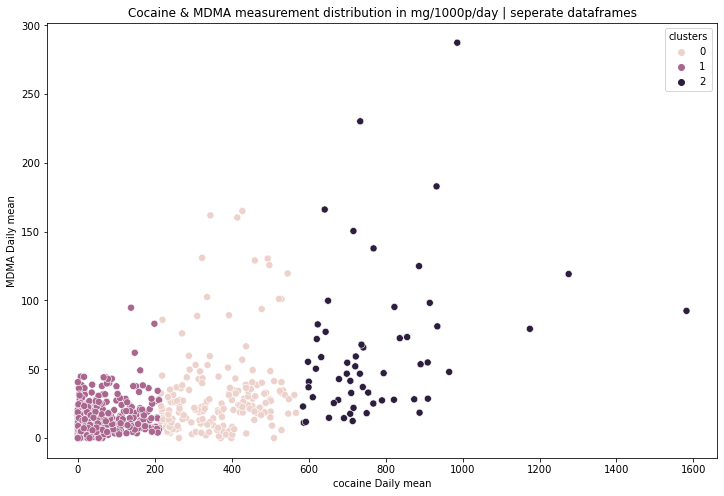

<Figure size 864x576 with 0 Axes>

<AxesSubplot:xlabel='cocaine Daily mean', ylabel='cannabis Daily mean'>

Text(0.5, 1.0, 'Cocaine & Cannabis measurement distribution in mg/1000p/day | seperate dataframes')

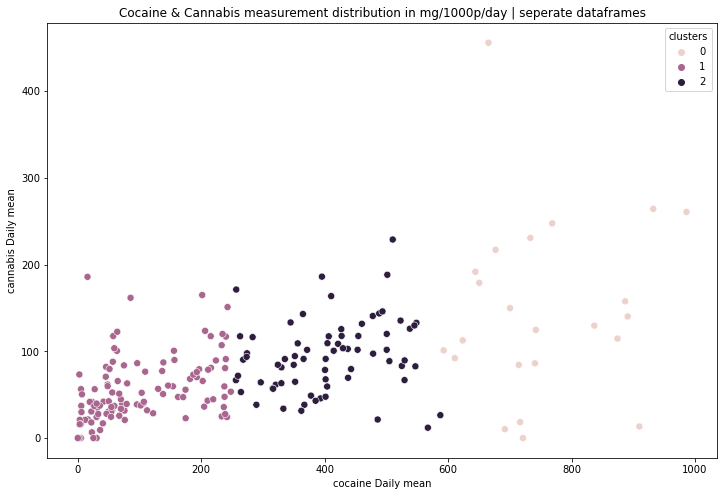

<Figure size 864x576 with 0 Axes>

<AxesSubplot:xlabel='MDMA Daily mean', ylabel='cannabis Daily mean'>

Text(0.5, 1.0, 'MDMA & Cannabis measurement distribution in mg/1000p/day | seperate dataframes')

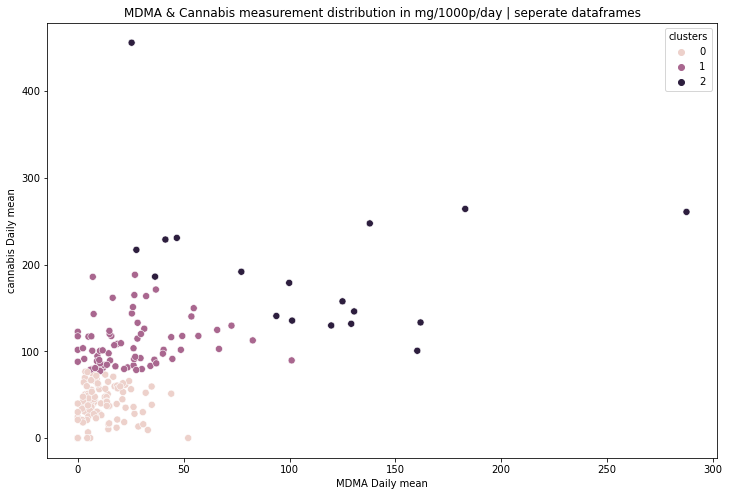

In [24]:
# Setting up the scatterplots for the drug combinations

for i in range(0,3):
    plt.figure(figsize=(12,8));
    sns.scatterplot(x=df_each_drug_comb[i][new_columns_list[targeta[i]]],y=df_each_drug_comb[i][new_columns_list[targetb[i]]],hue=df_each_drug_comb[i]['clusters'],s=50);
    plt.title(chart_title_list[targeta[i]]+' & '+chart_title_list[targetb[i]]+' measurement distribution in mg/1000p/day | seperate dataframes');
    plt.savefig(os.path.join(path,'04 Analysis','01 Visualizations','05 Machine Learning Clustering',chart_title_list[targeta[i]]+' & '+chart_title_list[targetb[i]]+' seperate dataframes Cluster.jpg'),bbox_inches='tight')
    plt.show();

<b>As earlier noted, the clustering depends on the drug consumption height/size. Therefore, these clusters dont' really share any new insights.</b>

In [25]:
# Setting up the kmeans object, fitting it and adding the cluster numbers to the dataframe with multiple drug measures

km_all_drugs = KMeans(n_clusters=3,random_state=1234)
km_all_drugs.fit(df_all_drugs)
df_all_drugs['clusters'] = km_all_drugs.fit_predict(df_all_drugs)

KMeans(n_clusters=3, random_state=1234)

In [26]:
# Controlling

df_all_drugs.head()
df_all_drugs['clusters'].value_counts()

,cocaine Daily mean,MDMA Daily mean,cannabis Daily mean,clusters
0,138.65,9.64,87.17,1
1,138.22,14.14,50.69,1
2,154.19,17.39,59.61,1
3,204.80,4.27,36.21,1
4,210.32,8.12,43.17,1


1    108
2     68
0     22
Name: clusters, dtype: int64

<Figure size 864x576 with 0 Axes>

<AxesSubplot:xlabel='cocaine Daily mean', ylabel='MDMA Daily mean'>

Text(0.5, 1.0, 'Cocaine & MDMA measurement distribution in mg/1000p/day | whole dataframe')

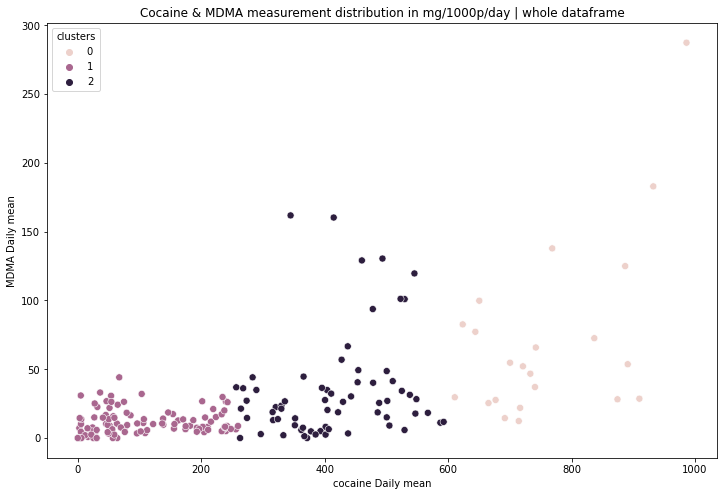

<Figure size 864x576 with 0 Axes>

<AxesSubplot:xlabel='cocaine Daily mean', ylabel='cannabis Daily mean'>

Text(0.5, 1.0, 'Cocaine & Cannabis measurement distribution in mg/1000p/day | whole dataframe')

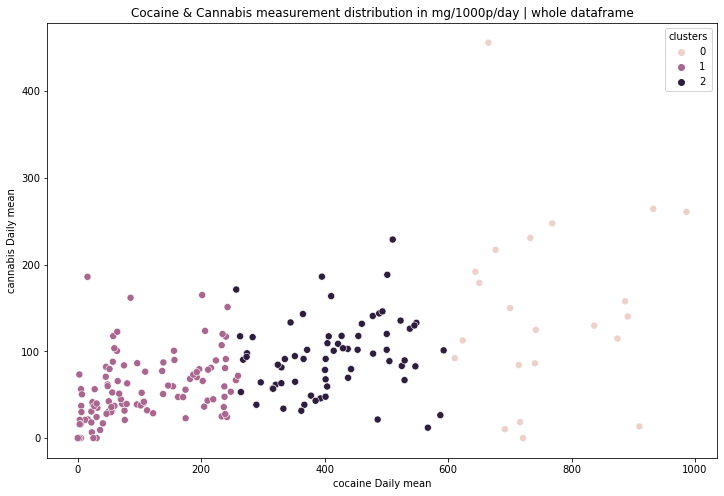

<Figure size 864x576 with 0 Axes>

<AxesSubplot:xlabel='MDMA Daily mean', ylabel='cannabis Daily mean'>

Text(0.5, 1.0, 'MDMA & Cannabis measurement distribution in mg/1000p/day | whole dataframe')

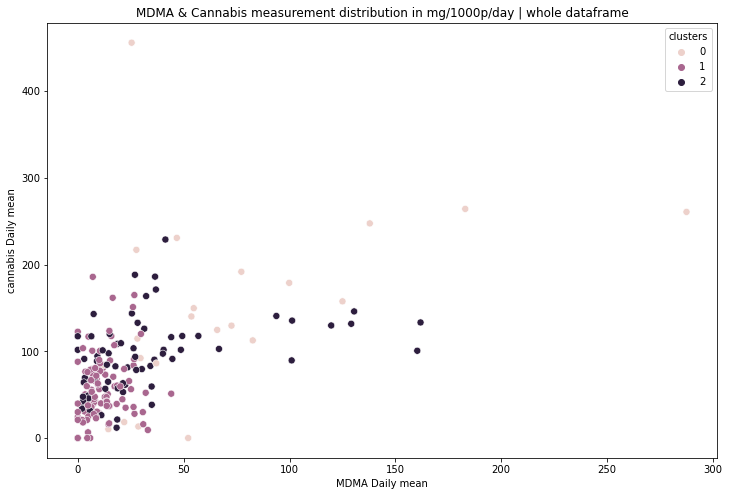

In [27]:
# Setting up the charts for the drug combinations based on the multiple drugs dataframe

for i in range(0,3):
    plt.figure(figsize=(12,8));
    sns.scatterplot(x=df_all_drugs[new_columns_list[targeta[i]]],y=df_all_drugs[new_columns_list[targetb[i]]],hue=df_all_drugs['clusters'],s=50);
    plt.title(chart_title_list[targeta[i]]+' & '+chart_title_list[targetb[i]]+' measurement distribution in mg/1000p/day | whole dataframe');
    plt.savefig(os.path.join(path,'04 Analysis','01 Visualizations','05 Machine Learning Clustering',chart_title_list[targeta[i]]+' & '+chart_title_list[targetb[i]]+' whole dataframes Cluster.jpg'),bbox_inches='tight')
    plt.show()

<b>We can see the impact of the clustering on the third chart. Apparently the clustering is mostly based on the Cocaine consumption. The last chart has only the Cannabis and MDMA measurements. Therefore, the clustering is not really observable.</b>

<h2>
    <font color=0096FF>
        <a href='#start'>4. The Stats and Charts of the Clusters</a><a id='fourth_chapter'></a>
    </font>
</h2>

As the clustering process is completed, let's see what the result is.

In [28]:
# Setting up the remerging process

df_ww_remerge = df_wastewater[['year','SiteID','country','city','latitude','longitude','population','Name']].copy()

In [29]:
# Controlling

df_ww_remerge.head()
df_ww_remerge.shape

,year,SiteID,country,city,latitude,longitude,population,Name
0,2021,AT001,AT,Graz,47.070713,15.439504,487040,Austria
1,2021,AT001,AT,Graz,47.070713,15.439504,487040,Austria
2,2021,AT001,AT,Graz,47.070713,15.439504,487040,Austria
3,2021,AT001,AT,Graz,47.070713,15.439504,487040,Austria
4,2021,AT001,AT,Graz,47.070713,15.439504,487040,Austria


(2569, 8)

In [30]:
# Setting up the merge ID

df_ww_remerge['yearID'] = df_ww_remerge['SiteID'].astype(str)+df_ww_remerge['year'].astype(str)

In [31]:
# Drop duplicates of the merge dataframe

df_ww_remerge.drop_duplicates(inplace=True)

In [32]:
# Controlling

df_ww_remerge.head()
df_ww_remerge.shape

,year,SiteID,country,city,latitude,longitude,population,Name,yearID
0,2021,AT001,AT,Graz,47.070713,15.439504,487040,Austria,AT0012021
5,2020,AT001,AT,Graz,47.070713,15.439504,487040,Austria,AT0012020
10,2019,AT001,AT,Graz,47.070713,15.439504,487040,Austria,AT0012019
15,2021,AT002,AT,Hall-Wattens,47.29168,11.59284,78180,Austria,AT0022021
20,2020,AT002,AT,Hall-Wattens,47.29168,11.59284,78180,Austria,AT0022020


(615, 9)

In [33]:
# Merging the dataframes

df_each_drug_comb_remerged = []

df_all_drugs['yearID'] = df_all_drugs_yearid_list

df_all_drugs_remerged = pd.merge(df_all_drugs,df_ww_remerge,how='inner',on='yearID')

for i in range(0,3):
    df_each_drug_comb_remerged.append(pd.merge(df_each_drug_comb[i],df_ww_remerge,how='inner',on='yearID'))

In [34]:
# Controlling the merge

df_all_drugs_remerged.head()
df_all_drugs_remerged.shape

for i in range(0,3):
    df_each_drug_comb_remerged[i].head()
    df_each_drug_comb_remerged[i].shape

,cocaine Daily mean,MDMA Daily mean,cannabis Daily mean,clusters,yearID,year,SiteID,country,city,latitude,longitude,population,Name
0,138.65,9.64,87.17,1,AT0012021,2021,AT001,AT,Graz,47.070713,15.439504,487040,Austria
1,138.22,14.14,50.69,1,AT0012020,2020,AT001,AT,Graz,47.070713,15.439504,487040,Austria
2,154.19,17.39,59.61,1,AT0012019,2019,AT001,AT,Graz,47.070713,15.439504,487040,Austria
3,204.80,4.27,36.21,1,AT0022021,2021,AT002,AT,Hall-Wattens,47.29168,11.59284,78180,Austria
4,210.32,8.12,43.17,1,AT0022020,2020,AT002,AT,Hall-Wattens,47.29168,11.59284,78180,Austria


(198, 13)

,cocaine Daily mean,MDMA Daily mean,clusters,yearID,year,SiteID,country,city,latitude,longitude,population,Name
0,138.65,9.64,1,AT0012021,2021,AT001,AT,Graz,47.070713,15.439504,487040,Austria
1,138.22,14.14,1,AT0012020,2020,AT001,AT,Graz,47.070713,15.439504,487040,Austria
2,154.19,17.39,1,AT0012019,2019,AT001,AT,Graz,47.070713,15.439504,487040,Austria
3,204.80,4.27,1,AT0022021,2021,AT002,AT,Hall-Wattens,47.29168,11.59284,78180,Austria
4,210.32,8.12,1,AT0022020,2020,AT002,AT,Hall-Wattens,47.29168,11.59284,78180,Austria


(581, 12)

,cocaine Daily mean,cannabis Daily mean,clusters,yearID,year,SiteID,country,city,latitude,longitude,population,Name
0,138.65,87.17,1,AT0012021,2021,AT001,AT,Graz,47.070713,15.439504,487040,Austria
1,138.22,50.69,1,AT0012020,2020,AT001,AT,Graz,47.070713,15.439504,487040,Austria
2,154.19,59.61,1,AT0012019,2019,AT001,AT,Graz,47.070713,15.439504,487040,Austria
3,204.80,36.21,1,AT0022021,2021,AT002,AT,Hall-Wattens,47.29168,11.59284,78180,Austria
4,210.32,43.17,1,AT0022020,2020,AT002,AT,Hall-Wattens,47.29168,11.59284,78180,Austria


(210, 12)

,MDMA Daily mean,cannabis Daily mean,clusters,yearID,year,SiteID,country,city,latitude,longitude,population,Name
0,9.64,87.17,1,AT0012021,2021,AT001,AT,Graz,47.070713,15.439504,487040,Austria
1,14.14,50.69,0,AT0012020,2020,AT001,AT,Graz,47.070713,15.439504,487040,Austria
2,17.39,59.61,0,AT0012019,2019,AT001,AT,Graz,47.070713,15.439504,487040,Austria
3,4.27,36.21,0,AT0022021,2021,AT002,AT,Hall-Wattens,47.29168,11.59284,78180,Austria
4,8.12,43.17,0,AT0022020,2020,AT002,AT,Hall-Wattens,47.29168,11.59284,78180,Austria


(200, 12)

In [35]:
# Statistical insights on the multiple drug dataframe cluster

df_all_drugs_remerged.groupby('clusters').agg({'cocaine Daily mean':['min','mean','median','max'],
                                             'MDMA Daily mean':['min','mean','median','max'],
                                             'cannabis Daily mean':['min','mean','median','max'],
                                             'year':['min','mean','median','max'],
                                             'population':['min','mean','median','max']})

cocaine Daily mean                              MDMA Daily mean  \
                        min        mean   median     max             min   
clusters                                                                   
0                    610.78  759.882273  727.185  986.15           12.36   
1                      0.00  105.604815   75.295  259.59            0.00   
2                    256.76  413.109265  404.275  592.73            0.00   

                                   cannabis Daily mean                       \
               mean median     max                 min        mean   median   
clusters                                                                      
0         71.096364  52.90  287.44                0.00  149.123182  134.910   
1         11.146481   8.68   44.13                0.00   55.838426   47.465   
2         33.837059  22.99  161.86               11.92   94.490441   92.455   

                  year                            population                 \
             max   min         mean  median   max        min           mean   
clusters                                                                      
0         455.92  2011  2017.727273  2019.0  2021      57000  511849.863636   
1         185.88  2011  2017.333333  2019.0  2021       7774  709581.259259   
2         228.93  2011  2018.338235  2019.0  2021      41688  442478.426471   

                              
            median       max  
clusters                      
0         462854.0   1200831  
1         132729.0  16525000  
2         285152.5   1332000

In [36]:
# Statistical insights on the drug combination cluster

for i in range(0,3):
    df_each_drug_comb_remerged[i].groupby('clusters').agg({new_columns_list[targeta[i]]:['min','mean','median','max'],
                                                          new_columns_list[targetb[i]]:['min','mean','median','max'],
                                                          'year':['min','mean','median','max'],
                                                          'population':['min','mean','median','max']})

cocaine Daily mean                              MDMA Daily mean  \
                        min        mean  median      max             min   
clusters                                                                   
0                    215.76  361.206010  362.19   567.18            0.00   
1                      0.00   65.703636   50.07   211.23            0.00   
2                    585.35  773.581207  727.86  1581.88           11.15   

                                    year                             \
               mean median     max   min         mean  median   max   
clusters                                                              
0         30.044404  21.98  165.08  2011  2017.124352  2017.0  2021   
1         15.183667  12.72   94.76  2011  2017.363636  2018.0  2021   
2         64.382759  49.22  287.44  2011  2017.534483  2018.0  2021   

         population                                     
                min           mean    median       max  
clusters                                                
0             10110  525695.248705  399425.0   3993500  
1              7774  476073.160606  171849.5  16525000  
2             49843  690384.896552  471275.0   3400000

cocaine Daily mean                              cannabis Daily mean  \
                        min        mean   median     max                 min   
clusters                                                                       
0                    592.73  752.614783  721.180  986.15                0.00   
1                      0.00  100.490087   69.800  247.97                0.00   
2                    256.23  404.828056  401.555  587.41               11.92   

                                      year                             \
                mean  median     max   min         mean  median   max   
clusters                                                                
0         147.036087  129.62  455.92  2011  2017.782609  2019.0  2021   
1          54.771739   44.67  185.88  2011  2017.356522  2019.0  2021   
2          94.193750   91.24  228.93  2011  2018.180556  2019.0  2021   

         population                                     
                min           mean    median       max  
clusters                                                
0             49843  491762.608696  454433.0   1200831  
1              7774  826474.582609  135458.0  16525000  
2             25414  435315.069444  300000.0   1332000

MDMA Daily mean                             cannabis Daily mean  \
                     min        mean  median     max                 min   
clusters                                                                   
0                   0.00   11.490367    8.12   52.14                0.00   
1                   0.00   25.243836   21.90  101.00               77.29   
2                  25.43  110.256111  110.44  287.44              100.66   

                                      year                             \
                mean  median     max   min         mean  median   max   
clusters                                                                
0          40.215688   39.33   76.53  2011  2017.642202  2019.0  2021   
1         108.302877  101.73  188.27  2011  2017.808219  2019.0  2021   
2         196.526667  182.54  455.92  2011  2018.055556  2019.0  2021   

         population                                     
                min           mean    median       max  
clusters                                                
0              7774  708092.522936  150000.0  16525000  
1             32583  444324.958904  262729.0   3700000  
2            300000  677927.500000  709500.0   1332000

Text(0.5, 1.0, 'Year and Population whole dataframe')

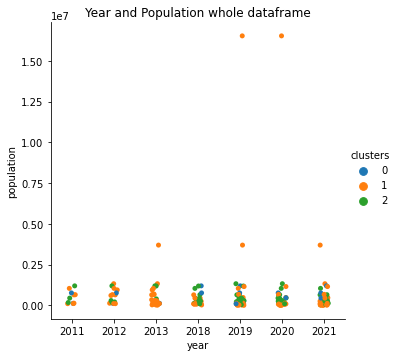

Text(0.5, 1.0, 'Cocaine & MDMA seperate dataframes')

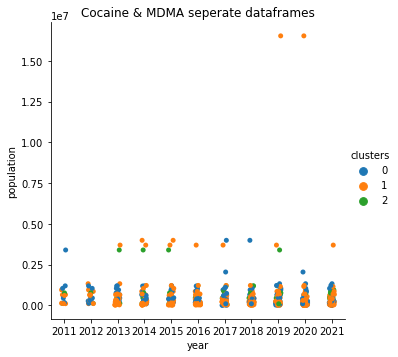

Text(0.5, 1.0, 'Cocaine & Cannabis seperate dataframes')

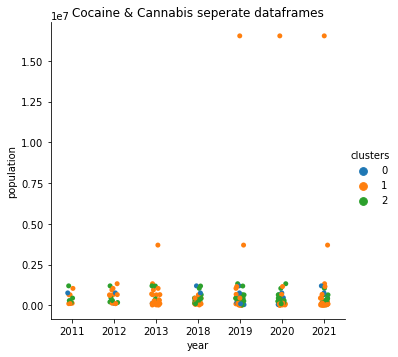

Text(0.5, 1.0, 'MDMA & Cannabis seperate dataframes')

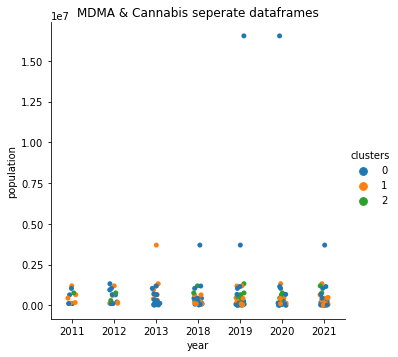

In [37]:
# Charts to visualize the results using the whole population

sns.catplot(x='year',y='population',hue='clusters',data=df_all_drugs_remerged);
plt.title('Year and Population whole dataframe')
plt.savefig(os.path.join(path,'04 Analysis','01 Visualizations','05 Machine Learning Clustering','Year and Population whole dataframe Catplot.jpg'),bbox_inches='tight')
plt.show();

for i in range(0,3):
    sns.catplot(x='year',y='population',hue='clusters',data=df_each_drug_comb_remerged[i]);
    plt.title(chart_title_list[targeta[i]]+' & '+chart_title_list[targetb[i]]+' seperate dataframes')
    plt.savefig(os.path.join(path,'04 Analysis','01 Visualizations','05 Machine Learning Clustering',chart_title_list[targeta[i]]+' & '+chart_title_list[targetb[i]]+' Year and Population seperate dataframes Catplot.jpg'),bbox_inches='tight')
    plt.show();

Text(0.5, 1.0, 'Year and Population whole dataframe')

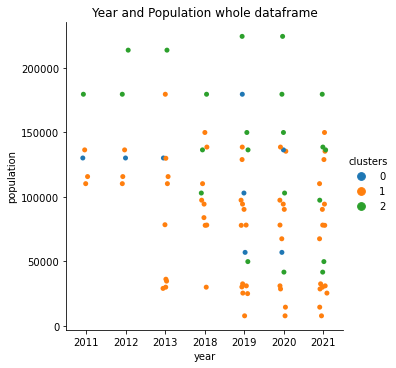

Text(0.5, 1.0, 'Cocaine & MDMA seperate dataframes')

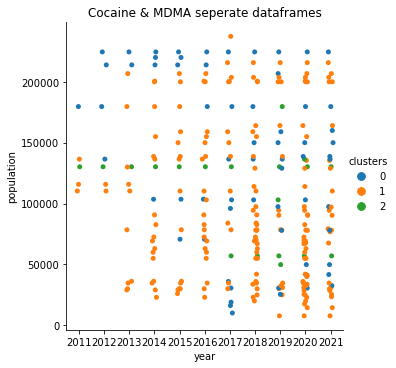

Text(0.5, 1.0, 'Cocaine & Cannabis seperate dataframes')

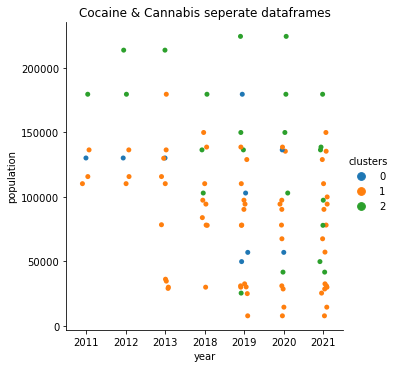

Text(0.5, 1.0, 'MDMA & Cannabis seperate dataframes')

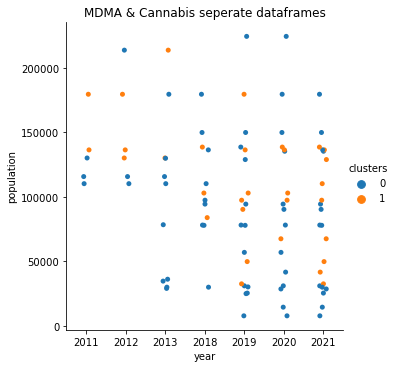

In [38]:
# Charts visualizing the results with a population limit, to better observe the results

sns.catplot(x='year',y='population',hue='clusters',data=df_all_drugs_remerged.loc[df_all_drugs_remerged['population']<250000]);
plt.title('Year and Population whole dataframe')
plt.savefig(os.path.join(path,'04 Analysis','01 Visualizations','05 Machine Learning Clustering','Year and Population whole dataframe Catplot.jpg'),bbox_inches='tight')
plt.show();

for i in range(0,3):
    sns.catplot(x='year',y='population',hue='clusters',data=df_each_drug_comb_remerged[i].loc[df_each_drug_comb_remerged[i]['population']<250000]);
    plt.title(chart_title_list[targeta[i]]+' & '+chart_title_list[targetb[i]]+' seperate dataframes')
    plt.savefig(os.path.join(path,'04 Analysis','01 Visualizations','05 Machine Learning Clustering',chart_title_list[targeta[i]]+' & '+chart_title_list[targetb[i]]+' Year and Population seperate dataframes Catplot below 250000.jpg'),bbox_inches='tight')
    plt.show();

Text(0.5, 1.0, 'Year and Population whole dataframe')

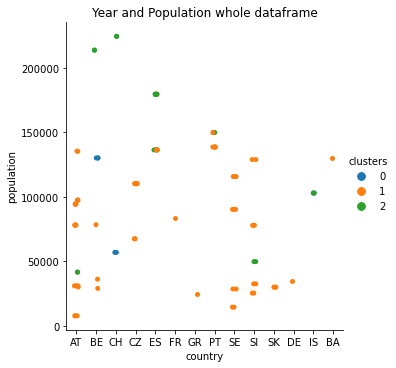

Text(0.5, 1.0, 'Cocaine & MDMA seperate dataframes')

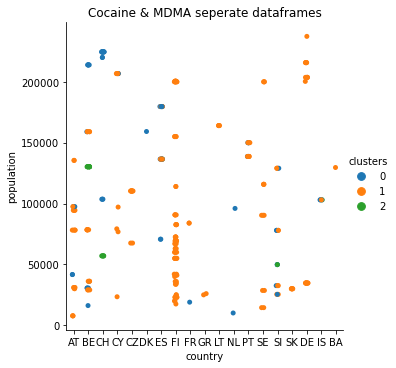

Text(0.5, 1.0, 'Cocaine & Cannabis seperate dataframes')

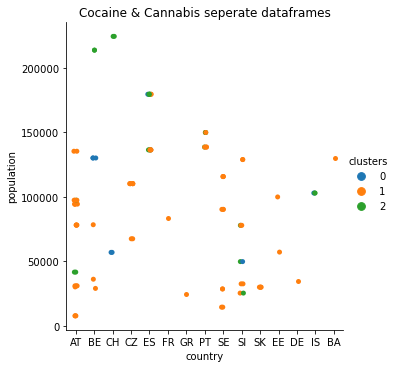

Text(0.5, 1.0, 'MDMA & Cannabis seperate dataframes')

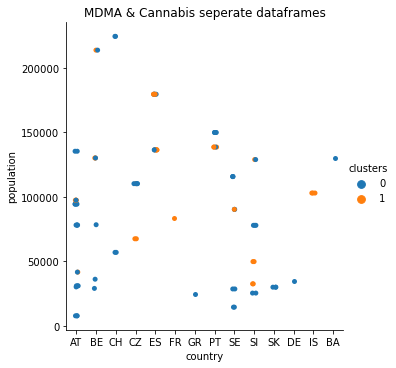

In [39]:
# Visualizing the results on the country category

sns.catplot(x='country',y='population',hue='clusters',data=df_all_drugs_remerged.loc[df_all_drugs_remerged['population']<250000]);
plt.title('Year and Population whole dataframe')
plt.savefig(os.path.join(path,'04 Analysis','01 Visualizations','05 Machine Learning Clustering','Country and Population whole dataframe Catplot.jpg'),bbox_inches='tight')
plt.show();

for i in range(0,3):
    sns.catplot(x='country',y='population',hue='clusters',data=df_each_drug_comb_remerged[i].loc[df_each_drug_comb_remerged[i]['population']<250000]);
    plt.title(chart_title_list[targeta[i]]+' & '+chart_title_list[targetb[i]]+' seperate dataframes')
    plt.savefig(os.path.join(path,'04 Analysis','01 Visualizations','05 Machine Learning Clustering',chart_title_list[targeta[i]]+' & '+chart_title_list[targetb[i]]+' Country and Population seperate dataframes Catplot below 250000.jpg'),bbox_inches='tight')
    plt.show();

<b>The results:</b>
<p>
    Sadly, the clustering process was rather disappointing. We didn't gained any new insights, and didn't see anything any patterns that might worth to research any further.
<p> 
    We see that with the years more measurement sites contributed to the project. We see impact of Finnlands MDMA and Cocaine consumption in the catplots. However, we don't see any new patterns or any new interesting abnormities.
<p>
    But there's one thing, that the catplots suggest nonetheless. The population limitation of below 250000 citizens, could be interesting...

<h2>
    <font color=0096FF>
        <a href='#start'>5. Limitation and Parameters</a><a id='fifth_chapter'></a>
    </font>
</h2>

If we limit the population we exclude specific cities and their measurement weight on the population measure. This could help the clustering process, could it?
<p>
    Besides that, we can change some parameters as well. The number of clusters could reveal different results. The elbow curve of the population limited dataframe has a wider breaking point and can allow using 2, 3, and 4 clusters.
<p>
    However, the data at hand as a specific limitation towards clustering. It contains only 3 kinds of numeric columns: Year, population and measurements. - But wait, the measurements are seperated into 10 different columns?! Yes. Nonetheless they're still playing in the same measuring unit. Let's see...

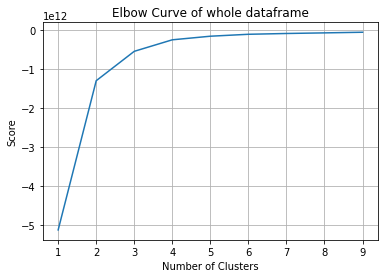

In [40]:
# Creating the elbow curve with a limited population dataframe

number_possible_clusters_v2 = range(1,10)
kmeans_score_v2 = [KMeans(n_clusters=i) for i in number_possible_clusters_v2]
cluster_score_v2 = [kmeans_score_v2[i].fit(df_wastewater_sub.loc[df_wastewater_sub['population']<250000]).score(df_wastewater_sub.loc[df_wastewater_sub['population']<250000]) for i in range(len(kmeans_score_v2))]
pl.plot(number_possible_clusters_v2,cluster_score_v2)
pl.xlabel('Number of Clusters');
pl.ylabel('Score');
pl.title('Elbow Curve of whole dataframe');
plt.grid()
plt.show();

KMeans(n_clusters=2, random_state=1234)

KMeans(n_clusters=3, random_state=1234)

KMeans(n_clusters=4, random_state=1234)

<Figure size 864x576 with 0 Axes>

<AxesSubplot:xlabel='population', ylabel='Daily mean'>

Text(0.5, 1.0, '2 Clusters seperated by population')

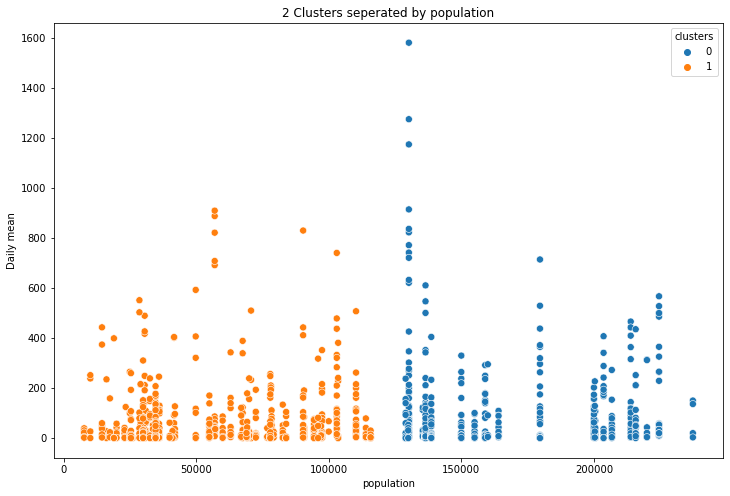

<Figure size 864x576 with 0 Axes>

<AxesSubplot:xlabel='population', ylabel='Daily mean'>

Text(0.5, 1.0, '3 Clusters seperated by population')

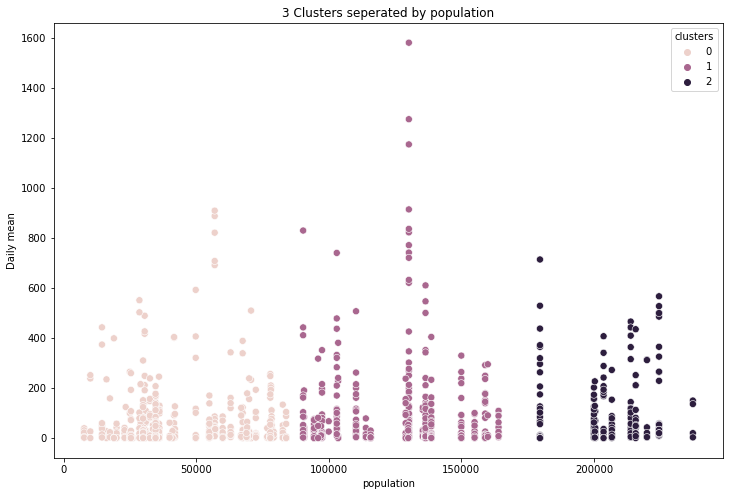

<Figure size 864x576 with 0 Axes>

<AxesSubplot:xlabel='population', ylabel='Daily mean'>

Text(0.5, 1.0, '4 Clusters seperated by population')

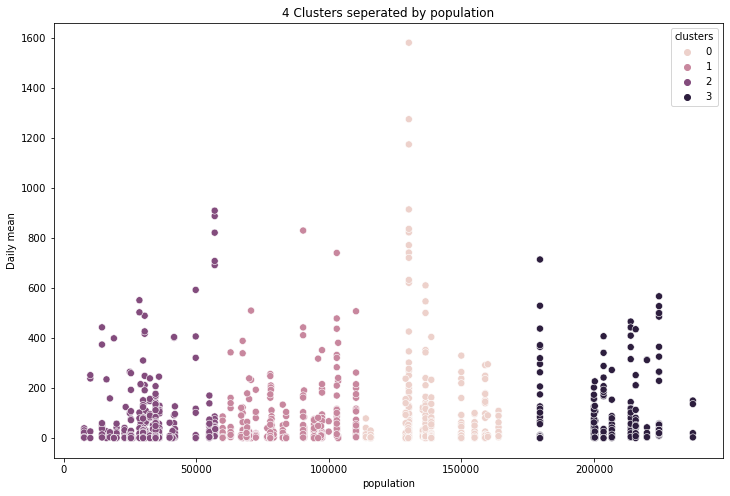

KMeans(n_clusters=2, random_state=1234)

KMeans(n_clusters=3, random_state=1234)

KMeans(n_clusters=4, random_state=1234)

<Figure size 864x576 with 0 Axes>

<AxesSubplot:xlabel='population', ylabel='Daily mean'>

Text(0.5, 1.0, '2 Clusters seperated by drug consumption')

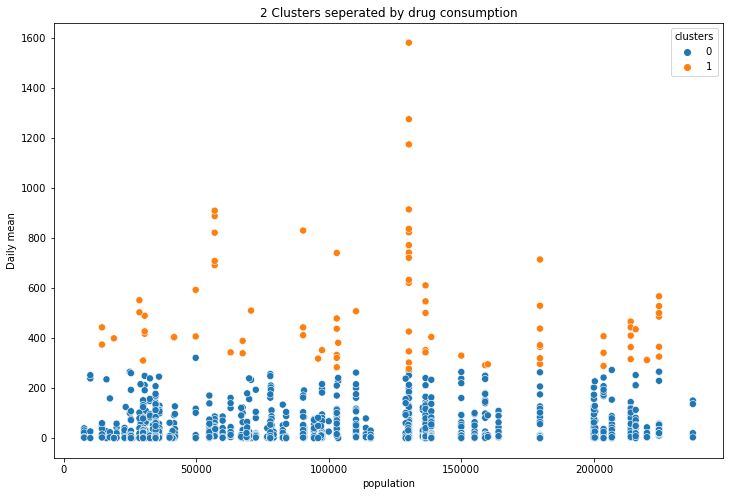

<Figure size 864x576 with 0 Axes>

<AxesSubplot:xlabel='population', ylabel='Daily mean'>

Text(0.5, 1.0, '3 Clusters seperated by drug consumption')

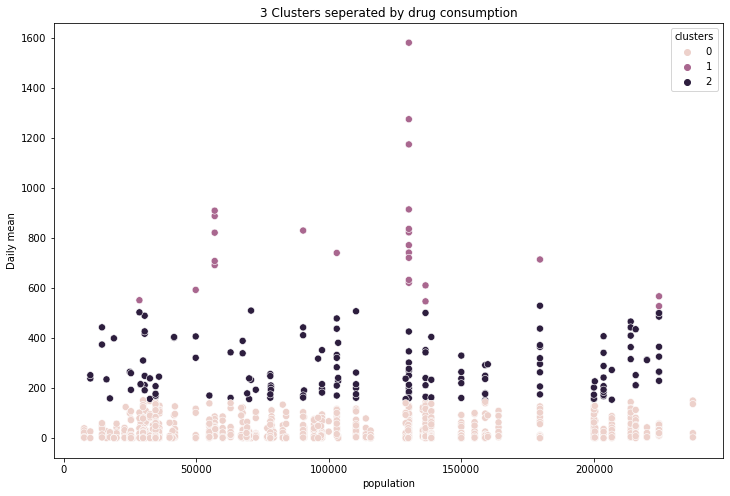

<Figure size 864x576 with 0 Axes>

<AxesSubplot:xlabel='population', ylabel='Daily mean'>

Text(0.5, 1.0, '4 Clusters seperated by drug consumption')

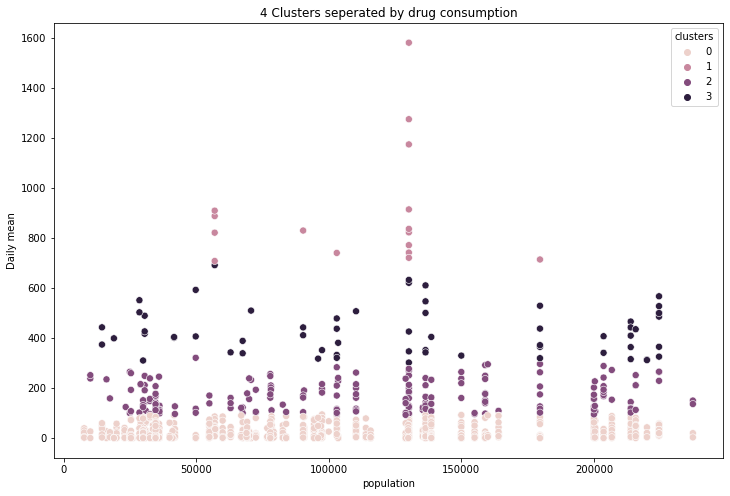

In [42]:
# To make this code bunch short: This excludes all categorical (including the year column) columns and the mean columns.
# Then there are two ways further:
#
# 1. Including the population column, then creating kmeans object, fitting and cluster columns for 2, 3, and 4 clusters,
#    AND adding daily mean on population scatterplots
#
# 2. Excluding the population column, then creating kmeans object, fitting and cluster columns for 2, 3, and 4 clusters,
#    AND adding the population column to then create the daily mean population scatterplots.
#
#
# The dictionary leaves opportunity to readd other columns as well. But to display the situation with the data at hand,
# we'll only need the population column.

df_whole = df_wastewater.loc[df_wastewater['population']<250000].copy()

df_whole_dict = {'year':df_whole['year'].tolist(),
                'metabolite':df_whole['metabolite'].tolist(),
                'SiteID':df_whole['SiteID'].tolist(),
                'country':df_whole['country'].tolist(),
                'city':df_whole['city'].tolist(),
                'latitude':df_whole['latitude'].tolist(),
                'longitude':df_whole['longitude'].tolist(),
                'population':df_whole['population'].tolist(),
                'Weekday mean':df_whole['Weekday mean'].tolist(),
                'Weekend mean':df_whole['Weekend mean'].tolist(),
                'Daily mean':df_whole['Daily mean'].tolist(),
                'Consumption flag':df_whole['Consumption flag'].tolist()}

cat_list = ['metabolite','country','consumption flag']
num_list = ['year','population','Daily mean']
cl_nm_list = ['2 Clusters','3 Clusters','4 Clusters']

for g in range(0,2):
    
    if g==0:
        
        kmeans_df_whole_remerge = []
        df_whole_dif_cl = []
        
        df_whole = df_wastewater.loc[df_wastewater['population']<250000].copy()
        df_whole.drop(columns=['metabolite','SiteID','country','city','latitude','longitude','Weekday mean','Weekend mean','Daily mean','avg diff weekend-weekday','Consumption flag','Name'],axis=1,inplace=True)
        
        for i in range(2,5):
            kmeans_df_whole_remerge.append(KMeans(n_clusters=i,random_state=1234))
            kmeans_df_whole_remerge[i-2].fit(df_whole)
            df_whole_dif_cl.append(df_whole.copy())
            df_whole_dif_cl[i-2]['clusters'] = kmeans_df_whole_remerge[i-2].fit_predict(df_whole_dif_cl[i-2])


        for i in range(0,3):
            df_whole_dif_cl[i]['Daily mean'] = df_whole_dict['Daily mean']

        for i in range(0,3):
            plt.figure(figsize=(12,8));
            sns.scatterplot(x=df_whole_dif_cl[i][num_list[1]],y=df_whole_dif_cl[i][num_list[2]],hue=df_whole_dif_cl[i]['clusters'],s=50)
            plt.title(cl_nm_list[i]+' seperated by population')
            plt.savefig(os.path.join(path,'04 Analysis','01 Visualizations','05 Machine Learning Clustering',cl_nm_list[i]+' Daily mean on population seperated by population.jpg'),bbox_inches='tight')
            plt.show();
        
    if g==1:
        
        kmeans_df_whole_remerge = []
        df_whole_dif_cl = []
        
        df_whole = df_wastewater.loc[df_wastewater['population']<250000].copy()
        df_whole.drop(columns=['population','metabolite','SiteID','country','city','latitude','longitude','Weekday mean','Weekend mean','Daily mean','avg diff weekend-weekday','Consumption flag','Name'],axis=1,inplace=True)
        
        for i in range(2,5):
            kmeans_df_whole_remerge.append(KMeans(n_clusters=i,random_state=1234))
            kmeans_df_whole_remerge[i-2].fit(df_whole)
            df_whole_dif_cl.append(df_whole.copy())
            df_whole_dif_cl[i-2]['clusters'] = kmeans_df_whole_remerge[i-2].fit_predict(df_whole_dif_cl[i-2])


        for i in range(0,3):
            df_whole_dif_cl[i]['Daily mean'] = df_whole_dict['Daily mean']
            df_whole_dif_cl[i]['population'] = df_whole_dict['population']

        for i in range(0,3):
            plt.figure(figsize=(12,8));
            sns.scatterplot(x=df_whole_dif_cl[i][num_list[1]],y=df_whole_dif_cl[i][num_list[2]],hue=df_whole_dif_cl[i]['clusters'],s=50)
            plt.title(cl_nm_list[i]+' seperated by drug consumption')
            plt.savefig(os.path.join(path,'04 Analysis','01 Visualizations','05 Machine Learning Clustering',cl_nm_list[i]+' Daily mean on population seperated by drug consumption.jpg'),bbox_inches='tight')
            plt.show();


<b>The final thoughts:</b>
<p>
    As we can see, the clustering always depends on either the measurement or the population, the only two measuring units (citizen and mg/1000p/day) the data provides. The centroid based process of kmeans has nothing else to work with in this case. Therefore, the centroids will always be either population dependend or consumption dependend.
<p>
    In the end, the clustering process failed in need of further data, that allows to cluster the data at hand into different centroid options.